In this project, I will be working on finding correlations between variables in a movie dataset and also extracting other insights from the data.
First we start by cleaning the data.
.####The dataset used was downloaded from kaggle

In [315]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import re
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


pd.options.mode.chained_assignment = None

# Read in the data
mvdata = pd.read_csv(r'C:\Users\hp\Downloads\movies.csv')

In [316]:
mvdata.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [291]:
# Find missing data by looping through to see if anything is missing
for col in mvdata.columns:
    missing_data_pct =np.mean(mvdata[col].isnull())
    print('{} - {}%'.format(col, round(missing_data_pct*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [292]:
#Drop all missing data
mvdata = mvdata.dropna(how='any',axis=0) 


In [293]:
for col in mvdata.columns:
    missing_data_pct =np.mean(mvdata[col].isnull())
    print('{} - {}%'.format(col, round(missing_data_pct*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [294]:
# Data types for the columns
mvdata.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [295]:
#Change data type of budget and gross from float to int as the .0 is not necessary 
mvdata['budget'] = mvdata['budget'].astype('int64')
mvdata['gross'] = mvdata['gross'].astype('int64')

In [296]:
mvdata.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


Going through the dataset, it was observed that the year in the released column and the year column for some of the movies are different. 
For example, 'The Gods Must Be Crazy' was released as shown in the 'released' column on 'October 26, 1984' while the column 'year' shows '1980'


In [297]:
#Create a valid year column = mvdata['Valid_Year']=mvdata['released'].astype(str).str[9:13]
for col in mvdata['released']:
    date_digits = re.findall(r'(\d{4})', col)
    print(date_digits[0])

1980
1980
1980
1980
1980
1980
1980
1980
1981
1980
1980
1984
1980
1980
1980
1980
1980
1980
1980
1981
1980
1980
1980
1980
1981
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1981
1981
1981
1983
1982
1981
1981
1981
1982
1981
1981
1981
1981
1981
1981
1981
1981
1981
1981
1982
1981
1981
1981
1981
1981
1981
1981
1982
1982
1981
1981
1981
1981
1981
1981
1981
1981
1983
1982
1981
1981
1981
1981
1981
1981
1981
1981
1981
1982
1981
1981
1982
1981
1981
1981
1981
1982
1982
1981
1981
1981
1981
1981
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1983
1983
1982
1982
1982
1983
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1983
1982
1982
1982
1983
1982
1983
1982
1982
1983
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1983
1983
1982
1982
1982
1982
1983
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1983
1983
1983
1983
1983
1983
1983
1983
1983
1983
1983
1983
1983
1984
1983
1983
1983
1983
1983
1983
1983
1983
1983
1983
1983
1983


In [298]:
def getvalidyear (colval): 
    date_digit = re.findall(r'(\d{4})', colval) 
    print(colval, date_digit)
    return date_digit[0]
mvdata['Valid_Year'] = mvdata['released' ].apply(getvalidyear)

June 13, 1980 (United States) ['1980']
July 2, 1980 (United States) ['1980']
June 20, 1980 (United States) ['1980']
July 2, 1980 (United States) ['1980']
July 25, 1980 (United States) ['1980']
May 9, 1980 (United States) ['1980']
June 20, 1980 (United States) ['1980']
December 19, 1980 (United States) ['1980']
June 19, 1981 (United States) ['1981']
May 16, 1980 (United States) ['1980']
December 17, 1980 (United States) ['1980']
October 26, 1984 (United States) ['1984']
December 12, 1980 (United States) ['1980']
September 19, 1980 (United States) ['1980']
July 25, 1980 (United States) ['1980']
October 3, 1980 (United States) ['1980']
December 19, 1980 (United States) ['1980']
February 8, 1980 (United States) ['1980']
February 15, 1980 (United States) ['1980']
April 24, 1981 (United States) ['1981']
August 1, 1980 (United States) ['1980']
August 8, 1980 (United States) ['1980']
June 20, 1980 (United States) ['1980']
February 1, 1980 (United States) ['1980']
April 24, 1981 (United States)

In [299]:
#altn = mvdata['released']
#def getvalyear(altn):
mvdata['Valid_Year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7648    2020
7649    2020
7650    2020
7651    2020
7652    2020
Name: Valid_Year, Length: 5421, dtype: object

In [300]:
mvdata.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Valid_Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [301]:
mvdata.sort_values(by = ['gross'], inplace = False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Valid_Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [302]:
#Drop duplicates
mvdata.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Valid_Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


                                         CORRELATION ANALYSIS

<function matplotlib.pyplot.show(*args, **kw)>

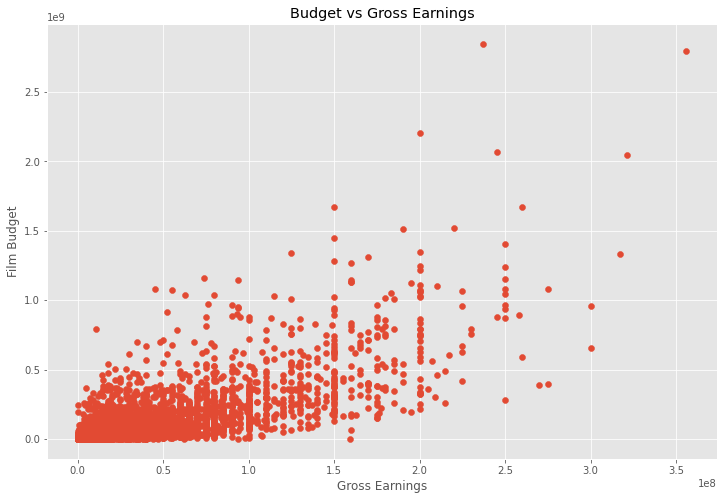

In [304]:
#Checking what features have the highest correlation 

#scatter plot with budget vs revenue 
plt.scatter(x=mvdata['budget'], y =mvdata['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show

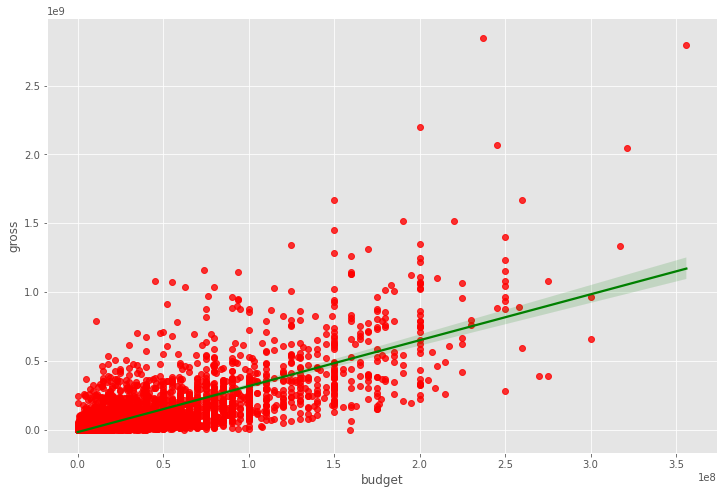

In [306]:
#plot the Budget vs Gross Earnings using seaborn for better view
sns.regplot(x='budget', y='gross', data = mvdata, scatter_kws={"color": "red"}, line_kws ={"color":"green"})

In [308]:
#check the correlation between columns with numeric values (pearson/kendall/spearman)
mvdata.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


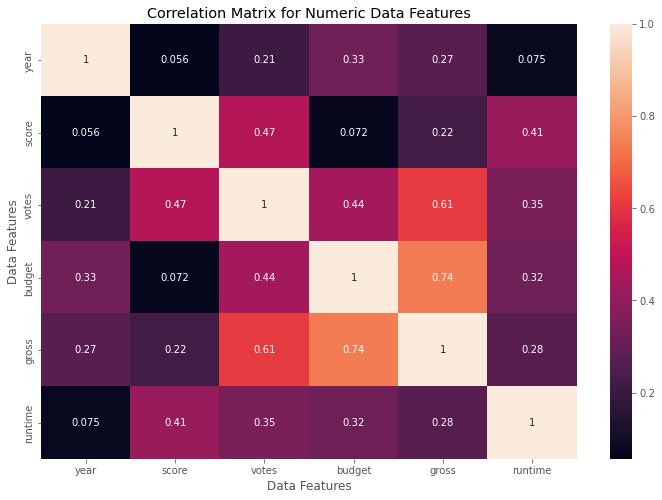

In [309]:
#Visualize the correlation matrix
correlation_matrix = mvdata.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Data Features')
plt.xlabel('Data Features')
plt.ylabel('Data Features')
plt.show()


In [310]:
#Change every column to numeric type in order to check for correlation accross dataset
mvdata_numeric = mvdata

for colname in mvdata_numeric.columns:
    if (mvdata_numeric[colname].dtype == 'object'):
        mvdata_numeric[colname] = mvdata_numeric[colname].astype('category')
        mvdata_numeric[colname] = mvdata_numeric[colname].cat.codes

mvdata_numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Valid_Year
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,40
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,40
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,40
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,40


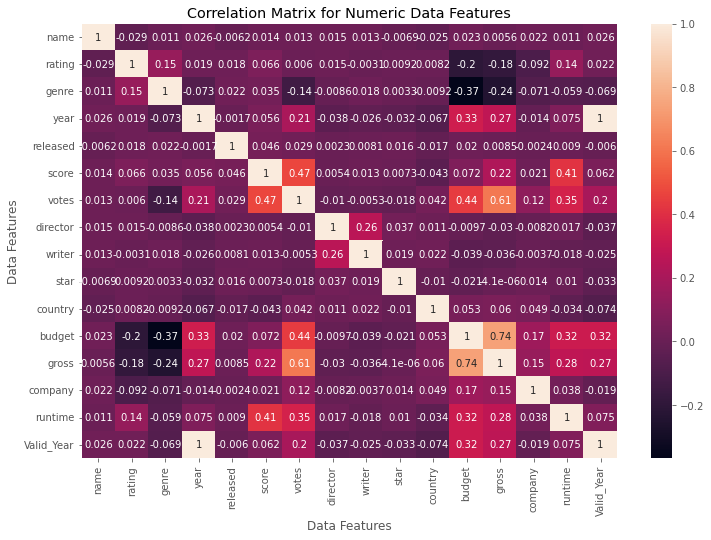

In [311]:
correlation_matrix = mvdata_numeric.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Data Features')
plt.xlabel('Data Features')
plt.ylabel('Data Features')
plt.show()

In [312]:
correlation_matrix = mvdata_numeric.corr()
correlation_pairs = correlation_matrix.unstack()
correlation_pairs

name        name          1.000000
            rating       -0.029234
            genre         0.010996
            year          0.025542
            released     -0.006152
                            ...   
Valid_Year  budget        0.320312
            gross         0.268721
            company      -0.018806
            runtime       0.075294
            Valid_Year    1.000000
Length: 256, dtype: float64

In [285]:
sorted_correlationpairs = correlation_pairs.sort_values()
sorted_correlationpairs

genre       budget       -0.368523
budget      genre        -0.368523
gross       genre        -0.244101
genre       gross        -0.244101
rating      budget       -0.203946
                            ...   
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
runtime     runtime       1.000000
Valid_Year  Valid_Year    1.000000
Length: 256, dtype: float64

In [286]:
high_correlation = sorted_correlationpairs[(sorted_correlationpairs) > 0.5]
high_correlation

gross       votes         0.614751
votes       gross         0.614751
gross       budget        0.740247
budget      gross         0.740247
year        Valid_Year    0.998726
Valid_Year  year          0.998726
name        name          1.000000
company     company       1.000000
gross       gross         1.000000
budget      budget        1.000000
country     country       1.000000
star        star          1.000000
writer      writer        1.000000
director    director      1.000000
votes       votes         1.000000
score       score         1.000000
released    released      1.000000
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
runtime     runtime       1.000000
Valid_Year  Valid_Year    1.000000
dtype: float64

                 OTHER USEFUL INSIGHTS

In [314]:
mvdata

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Valid_Year
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,40
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,40
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,40
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,40


**Most expensive and profitable movies from 1980-2020.**


Text(0, 0.5, 'Movie Title')

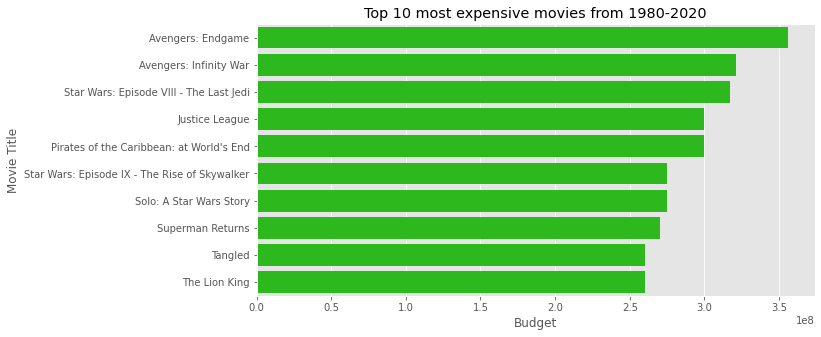

In [322]:
#To get the most expensive movies, we will extract movies that had the highest budget

mostexpensive_movie = mvdata.sort_values('budget', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=mostexpensive_movie.budget, y=mostexpensive_movie.name, color='#19d204')
plt.title('Top 10 most expensive movies from 1980-2020')
plt.xlabel('Budget')
plt.ylabel('Movie Title')

Text(0, 0.5, 'Movie Title')

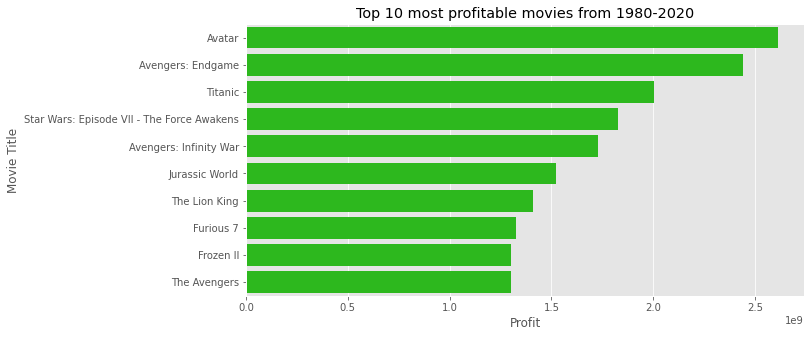

In [325]:
#To get the most profitable movies, gross was subtrated from budget
def profit(row):
    row.gross = row.gross - row.budget
    return row


mostprofitable_movies = mvdata[mvdata.gross.notnull() & mvdata.budget.notnull()].apply(profit, axis='columns').rename(columns={'gross': 'profit'}).sort_values('profit', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=mostprofitable_movies.profit, y=mostprofitable_movies.name, color='#19d204')
plt.title('Top 10 most profitable movies from 1980-2020')
plt.xlabel('Profit')
plt.ylabel('Movie Title')

**Most popular and most voted movies**

According to Moghaddam et al (2019), A very common approach for measuring the movie popularity is based on counting the number of ratings (as user votes) provided by a community of the existing users.

Text(0, 0.5, 'Movie Title')

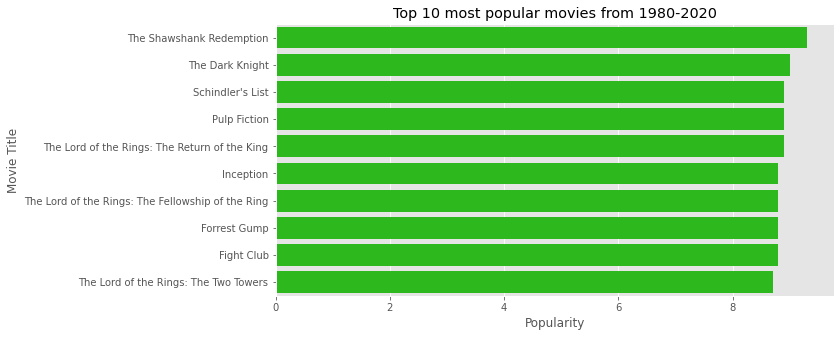

In [327]:
#Calculate the movie with the highest score

mostpopular_movies = mvdata[mvdata.score.notnull()].sort_values('score', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.title('Top 10 most popular movies from 1980-2020')
sns.barplot(x=mostpopular_movies.score, y=mostpopular_movies.name, color='#19d204')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')



Text(0, 0.5, 'Movie Title')

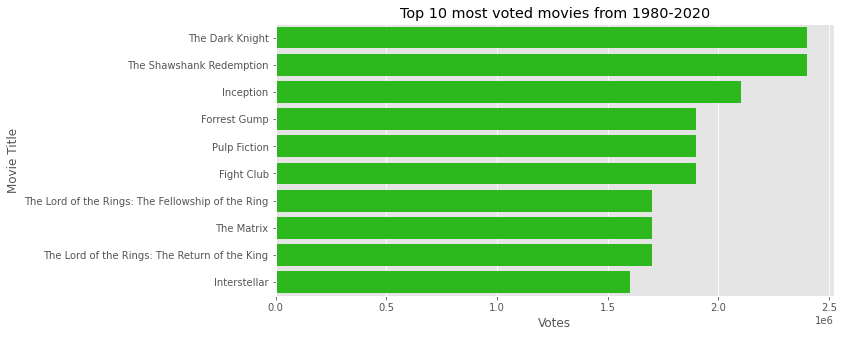

In [329]:
##Most voted movies
mostvoted_movies = mvdata[mvdata.votes.notnull()].sort_values('votes', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.title('Top 10 most voted movies from 1980-2020')
sns.barplot(x=mostvoted_movies.votes, y=mostvoted_movies.name, color='#19d204')
plt.xlabel('Votes')
plt.ylabel('Movie Title')

Text(0, 0.5, '')

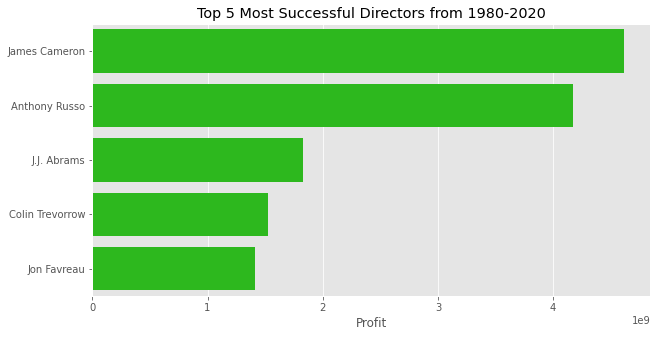

In [341]:
#Most succesful direvtor in terms of how successful their movies are/are

mostsuccessful_directors = mostprofitable_movies.groupby('director').profit.sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=mostsuccessful_directors, y=mostsuccessful_directors.index, color='#19d204')
plt.title('Top 5 Most Successful Directors from 1980-2020')
plt.xlabel('Profit')
plt.ylabel(None)

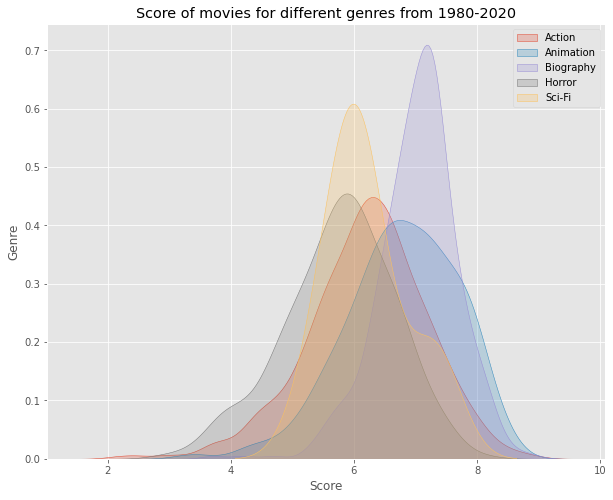

In [348]:
# Average score of movies according to genre
plt.figure(figsize=(10, 8))

for genre in ['Action', 'Animation', 'Biography', 'Horror', 'Sci-Fi']:
    sns.kdeplot(mvdata[mvdata.score.notnull() & (mvdata.genre == genre)].score, fill=True, label=genre)

plt.legend()
plt.title('Score of movies for different genres from 1980-2020')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.show()





In [332]:
mvdata['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

**Summarry of Findings**

From the correlation analysis it was found that Budget and Votes have the highest correlation to gross earnings. Which means:

~ The higher the votes the more the earnings

~ The higher the budget, the more the earnings

Other Insights:

- Most popluar movie = The Shawshark Redemption, followed by The Dark Knight
- Most expensive movie = Avenger: Endgame, followed by Avengers: Infinity War
- Most profitable movie = Avatar, followed by Avengers: Endgame
- Most successful director = James Cameron
- Genre with the highest movie score = Biography
